In [1]:
from neuron import h

try:
    h.nrn_load_dll("../Models/Sanjay_model/x86_64/libnrnmech.so")
except:
    pass

h.load_file("stdrun.hoc")
h.tstop = 300

In [2]:
import sys
import os

sys.path.append("../Models/Sanjay_model")

print(os.getcwd())

x = os.listdir("../Models/Sanjay_model")
for i in x:
    print(i)

/home/Marc/Documents/internship/python_analysis/Notebooks
.git
CA1ih.mod
vecevent.mod
icapr.mod
ihpyrkop.mod
network.py
MyExp2SynNMDABB.mod
stats.hoc
decmat.hoc
MyExp2SynNMDA.mod
capr.mod
__pycache__
simctrl.hoc
init.hoc
CA1ikdr.mod
declist.hoc
networkmsj.py
syncode.hoc
Epileptic Activity.png
local.hoc
kdrbwb.mod
default.hoc
pyinit.py
labels.hoc
MyExp2SynBB.mod
readme.html
misc.mod
kdrolmkop.mod
kcaolmw.mod
CA1ina.mod
nafbwb.mod
decnqs.hoc
temp.py
kaolmkop.mod
kahppr.mod
xtmp
nqs_utils.hoc
stats.mod
x86_64
geom.py
misc.h
icaolmw.mod
nafpyrkop.mod
nrnoc.hoc
nafolmkop.mod
drline.hoc
kdrpyrkop.mod
kapyrkop.mod
iholmkop.mod
iholmw.mod
xgetargs.hoc
CA1ika.mod
decvec.hoc
wrap.mod
vecst.mod
kcpr.mod
MyExp2SynAlpha.mod
nafpr.mod
run.py
geom.hoc
MyExp2Syn.mod
kdrpr.mod
params.py
aux_fun.inc
mosinit.py
grvec.hoc
caolmw.mod
nqs.hoc


# Import modules


In [3]:
# Import necessary modules, also Sanjay's geometry and network modules
from geom import *
from networkmsj import Population
import numpy as np
import matplotlib.pyplot as plt

Setting Cells
Setting Connections
PYR -> X , NMDA
PYR -> X , AMPA
BAS -> X , GABA
OLM -> PYR , GABA


NEURON: syntax error
 near line 1
 CTYP.o(PYRt).s="PYRt"
     ^
NEURON: syntax error
 near line 1
 CTYP.o(BASKETt).s="BASKETt"
     ^
NEURON: syntax error
 near line 1
 CTYP.o(OLMt).s="OLMt"
     ^
NEURON: syntax error
 near line 1
 CTYP.o(PSRt).s="PSRt"
     ^
NEURON: ix not an array variable
 near line 1
 ix[PYRt]=0
         ^
NEURON: ixe not an array variable
 near line 1
 ixe[PYRt]=799
          ^
NEURON: ix not an array variable
 near line 1
 ix[BASKETt]=800
            ^
NEURON: ixe not an array variable
 near line 1
 ixe[BASKETt]=999
             ^
NEURON: ix not an array variable
 near line 1
 ix[OLMt]=1000
         ^
NEURON: ixe not an array variable
 near line 1
 ixe[OLMt]=1199
          ^
NEURON: ix not an array variable
 near line 1
 ix[PSRt]=1200
         ^
NEURON: ixe not an array variable
 near line 1
 ixe[PSRt]=1200
          ^
NEURON: numc not an array variable
 near line 1
 numc[PYRt]=800
           ^
NEURON: numc not an array variable
 near line 1
 numc[BASKETt]=200


PYR -> PSR, AMPA/NMDA
set network from default constructor


# Data directory


In [4]:
# Define the path to the data directory
data_directory = "../data/Data01_Baseline_Sanjay"

# Create a dictionary to store the paths of pickle files
pkl_files = {}

# Iterate over the files in the data directory
for file_name in os.listdir(data_directory):
    if file_name.endswith(".pkl"):
        file_path = os.path.join(data_directory, file_name)
        pkl_files[file_name] = file_path

# Print the keys in the dictionary of pickle files
print(pkl_files.keys())

dict_keys(['baseline_pops.pkl', 'na_conductance_down_95_pops.pkl', 'na_conductance_up_105_pops.pkl', 'na_conductance_down_90_pops.pkl', 'na_conductance_up_110_pops.pkl', 'ka_g_150_pops.pkl', 'ka_g_200_pops.pkl', 'na_conductance_up_150_pops.pkl'])


# Data file selection


In [5]:
import ipywidgets as widgets
from IPython.display import clear_output
import pickle
import time

# Create a dropdown widget for file selection
file_selector = widgets.Dropdown(
    options=list(pkl_files.keys()), description="Select a pkl file:", disabled=False
)

# Define a global variable to hold the loaded data
selected_data = None


def handle_file_selection(change):
    global selected_data  # Declare selected_data as global
    selected_file = change.new
    file_path = pkl_files[selected_file]
    # Load the selected file
    with open(file_path, "rb") as f:
        selected_data = pickle.load(f)
    clear_output()  # Clear the output from previous selection
    print(f"Selected file: {selected_file}")  # Print the name of the selected file


# Register the file selection event handler
file_selector.observe(handle_file_selection, names="value")

# Display the file selector widget
display(file_selector)

Selected file: baseline_pops.pkl


## Population data


In [7]:
# Accessing individual populations
pyr_population = selected_data[0]  # = selected data = population, originally
bas_population = selected_data[1]
olm_population = selected_data[2]
psr_population = selected_data[3]  # sensor cells, can mostly ignore

# Print the dictionary of populations per file
print(selected_data)

[<networkmsj.Population object at 0x7fdd13fc9820>, <networkmsj.Population object at 0x7fdd132201c0>, <networkmsj.Population object at 0x7fdd13172d30>, <networkmsj.Population object at 0x7fdd130b79a0>]


In [8]:
# List of populations containing 3 population elements, except psr_population
pop_list = [pyr_population, bas_population, olm_population]

## Celldata


In [9]:
# Create a lists of all cells in the network
cells = [cell for pop in pop_list for cell in pop.cell]  # total cells
pyr_cells = [cell for cell in cells if cell in pyr_population.cell]
bas_cells = [cell for cell in cells if cell in bas_population.cell]
olm_cells = [cell for cell in cells if cell in olm_population.cell]

# Print the number of cells per population
print(
    f"Total cells: {len(cells)}, Pyr cells: {len(pyr_cells)}, Bas cells: {len(bas_cells)}, OLM cells: {len(olm_cells)}"
)

Total cells: 1200, Pyr cells: 800, Bas cells: 200, OLM cells: 200


In [10]:
# Initialize an empty list to store spike times
spike_times_array = []

# Initialize an index counter
idx = 0

# Iterate over each population in the list
for pop in pop_list:
    # Iterate over each cell in the current population
    for i, cell in enumerate(pop.cell):
        # Get the spike times for the current cell
        spike_times = pop.ltimevec[i]

        # Set the _gid attribute of the cell to the current index
        cell._gid = idx

        # Set the spike_times attribute of the cell to the spike times
        cell.spike_times = pop.ltimevec[i]

        # Append the spike times to the spike_times_array list
        spike_times_array.append(spike_times)

        # Increment the index
        idx += 1

In [11]:
save_file = True  # set to True if you want to save the figures

# save_folder = '/home/Marc/Documents/MSc_internship_Marc/python_analysis/imgs'

# Firing Rates


In [12]:
import pandas as pd

pop_names = ["pyr_population", "bas_population", "olm_population"]

# Define the time window for calculating firing rates
time_window = 5  # in ms

# Calculate the firing rates per population
firing_rates = {}

for i, pop in enumerate(pop_list):
    pop_name = pop_names[i]
    num_cells = len(pop.ltimevec)
    rates = []

    for cell_index in range(num_cells):
        spike_times = pop.ltimevec[cell_index]
        num_spikes = len(spike_times)
        firing_rate = num_spikes / time_window  # convert time window to seconds
        rates.append(firing_rate)

    firing_rates[pop_name] = rates

    # # Print the firing rates per population
    # for pop_name, rates in firing_rates.items():
    #     print(f"Firing rates for {pop_name}:")
    #     for cell_index, rate in enumerate(rates):
    #         print(f"Cell {cell_index + 1}: {rate} Hz")
    #     print()

    # Create a dictionary to store the firing rates per population
    firing_rates_dict = {}

    # Find the maximum length of firing rates
    max_length = max(len(rates) for rates in firing_rates.values())

    # Pad the shorter arrays with NaN values
    for pop_name, rates in firing_rates.items():
        padded_rates = rates + [float("nan")] * (max_length - len(rates))
        firing_rates_dict[pop_name] = padded_rates

    # Create the dataframe
    df_firing_rates = pd.DataFrame(firing_rates_dict)

# Show the dataframe
df_firing_rates

# average per population
average_firing_rates = df_firing_rates.mean()
print(average_firing_rates)

pyr_population     3.34875
bas_population    21.19800
olm_population     1.59300
dtype: float64


# Spike times


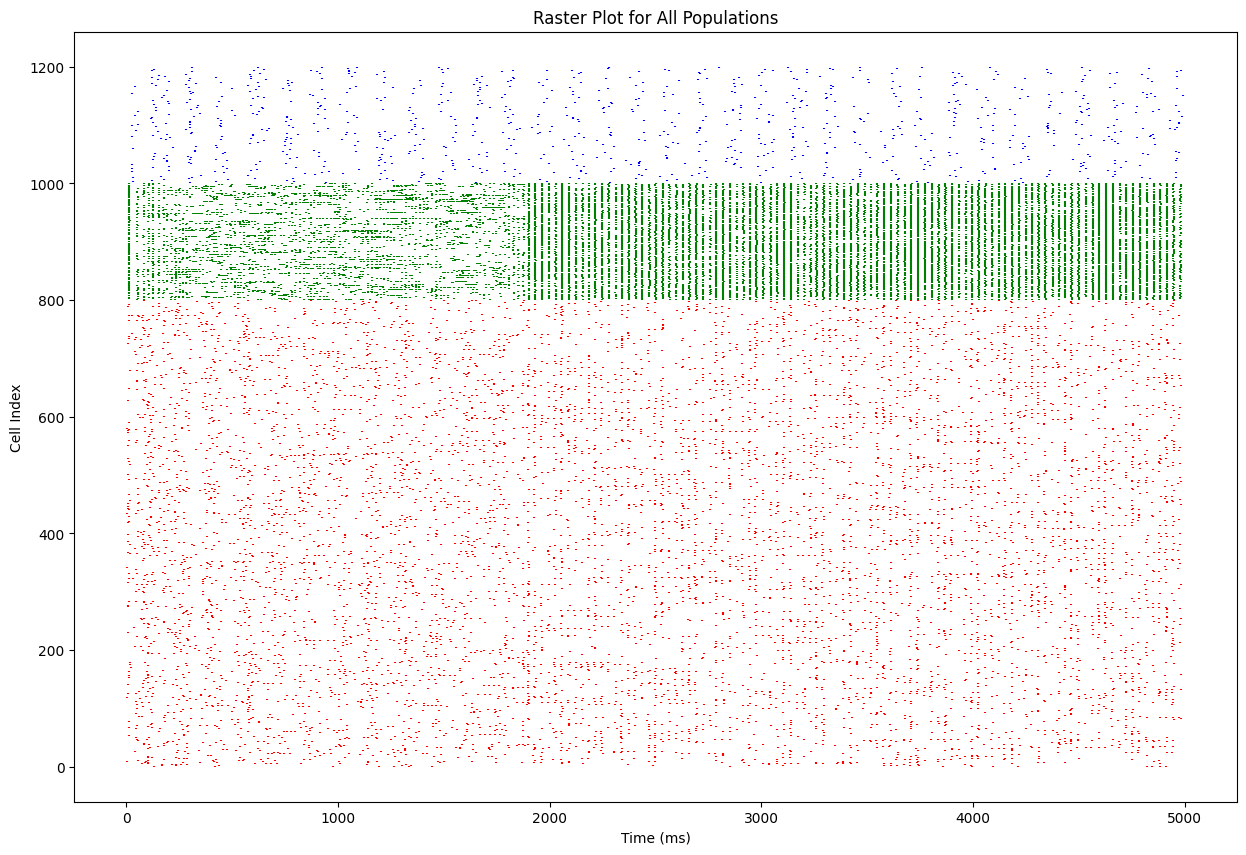

In [25]:
import sys

sys.path.append("/home/Marc/Documents/internship/python_analysis")
from src.SanjayCode import *

# Define colors for each population
pop_colors = {
    "pyr_population": "red",
    "bas_population": "green",
    "olm_population": "blue",
}

# Call the function to calculate spike times
spike_times_list = calculate_spike_times(pop_list)

# Call the function to plot a single population
# plot_single_population(pop_list[0], pop_names[0])

# Call the function to plot all populations together
plot_all_populations(pop_list, pop_names, pop_colors)

# Call the function to calculate spike times
spike_times_list = calculate_spike_times(pop_list)

# Alternatively, you can use the following code to plot the spike raster:
from SynapticaSims import Plotting

# Plotting.plot_spikes(cells)

# Convoluted Spikes


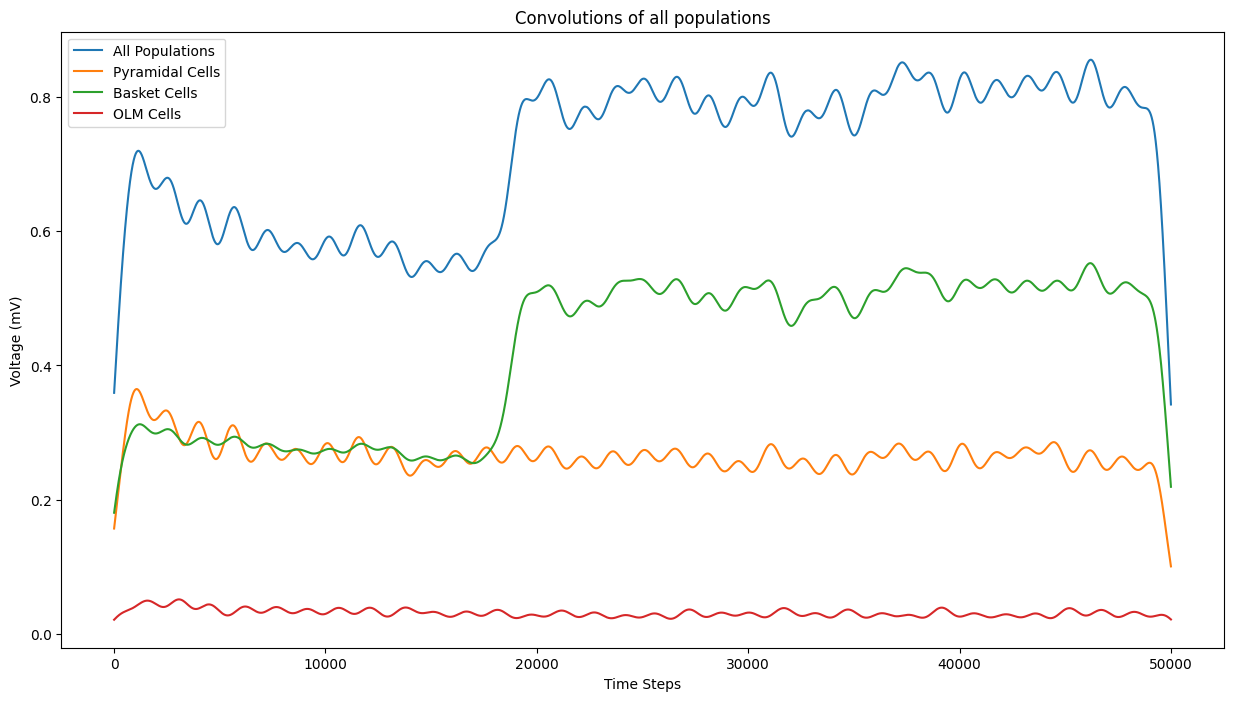

In [26]:
# Convoluted spike times, length of simulation = 500 ms
plt.figure(figsize=(15, 8))
plt.title("Convolutions of all populations")
plt.xlabel("Time Steps")
plt.ylabel("Voltage (mV)")

result = Plotting.fast_convolution_threaded(cells, 12, sig_len=50_001, dt=0.1)
plt.plot(result, label="All Populations")

result = Plotting.fast_convolution_threaded(pyr_cells, 12, sig_len=50_001, dt=0.1)
plt.plot(result, label="Pyramidal Cells")

result = Plotting.fast_convolution_threaded(bas_cells, 12, sig_len=50_001, dt=0.1)
plt.plot(result, label="Basket Cells")

result = Plotting.fast_convolution_threaded(olm_cells, 12, sig_len=50_001, dt=0.1)
plt.plot(result, label="OLM Cells")

plt.legend()

# Kernel Density Estimate


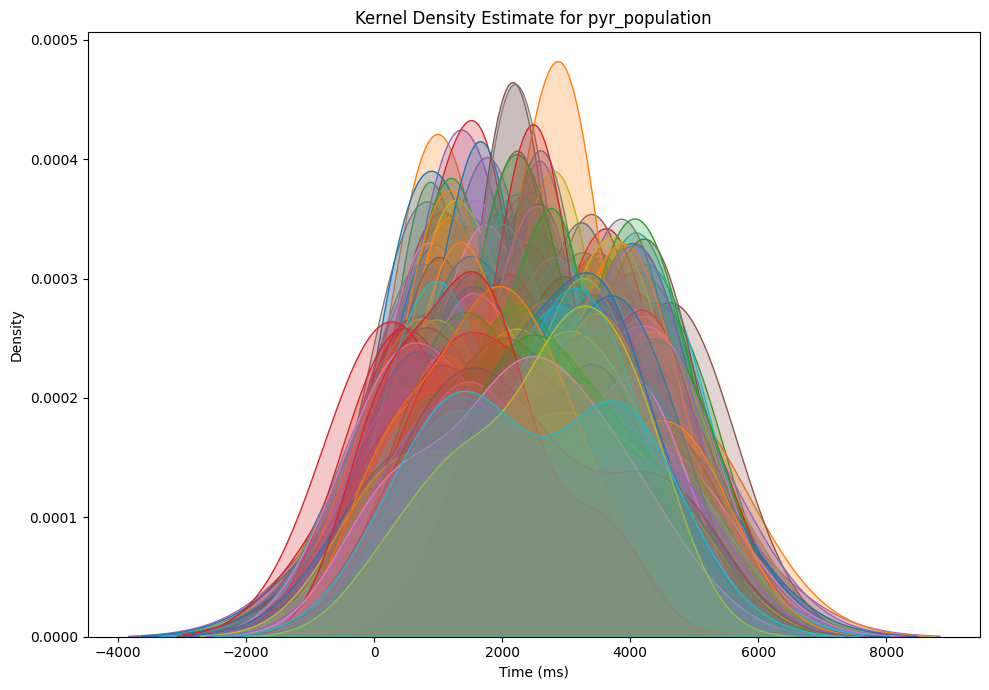

In [27]:
# Calculate KDE data
kde_data = calculate_population_kde(pyr_population)

# Plot KDE
plot_kde(kde_data, "pyr_population")

# Traces


In [28]:
print(len(pyr_cells))
print(pyr_cells[0].soma_volt)

800
[-65.       -64.70079  -64.461365 ... -66.76855  -66.73262  -66.6971  ]


In [29]:
# result = Plotting.plot_traces(pyr_cells[:3], sections=['soma_volt']) # plot first 3 pyramidal cells voltage traces
# plt.show(result)

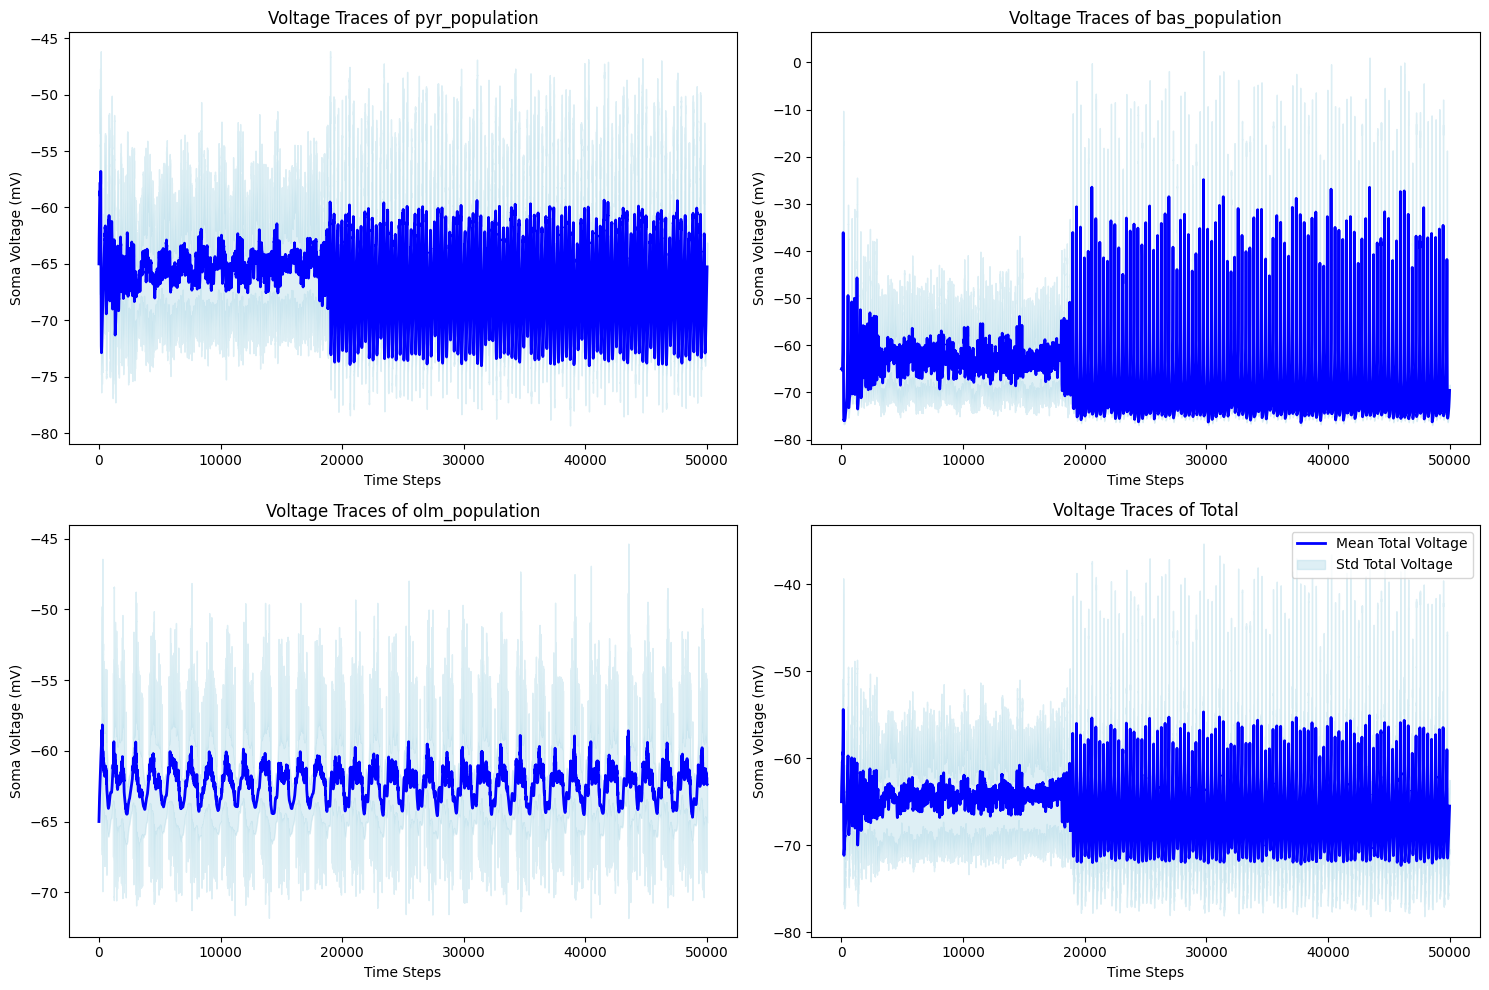

In [30]:
# Calculate voltage statistics
voltage_stats = calculate_voltage_statistics(pop_list, pop_names)

## plot voltage_stats
# print(voltage_stats)

# Plot voltage traces
plot_voltage_traces(voltage_stats)

# Moveing window spike count


In [31]:
# counts = Plotting.moving_window_spike_count(pyr_cells)
# plt.plot(counts)

In [32]:
sys.path.append("/home/Marc/Marc_network_sims"),
from SanjayUtilities import calc_lfp_from_population

# Calculate the LFP
lfp_result = calc_lfp_from_population(pyr_population)

# Plot the LFP
plt.figure(figsize=(10, 5))
plt.plot(lfp_result, label="LFP")
plt.title("Local Field Potential (LFP)")
plt.xlabel("Time Steps")
plt.ylabel("Voltage (mV)")
plt.grid(True)

ModuleNotFoundError: No module named 'SanjayUtilities'

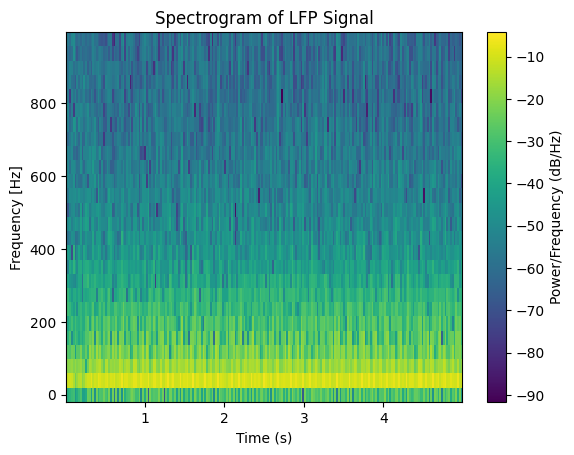

In [ ]:
sampling_rate = 10000  # in Hz
# Create spectrogram
frequencies, times, spectrogram_data = create_spectrogram(lfp_result, sampling_rate)

# Plot spectrogram
plot_spectrogram(frequencies, times, spectrogram_data)

(-80.0, 80.0)

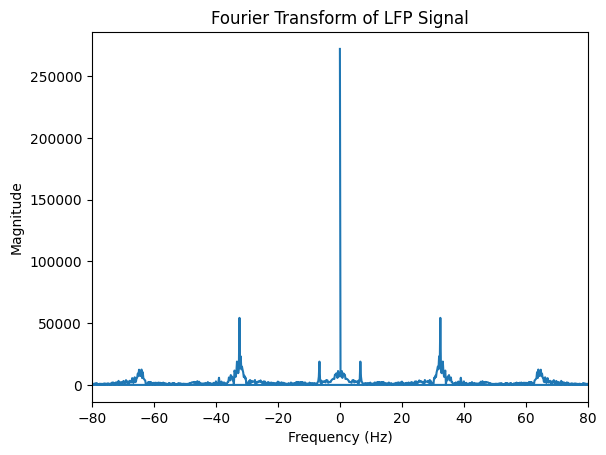

In [ ]:
# Compute the Discrete Fourier Transform (DFT)
frequencies = np.fft.fftfreq(len(lfp_result), d=1 / sampling_rate)
fft_values = np.fft.fft(lfp_result)

# Plot the magnitude spectrum
plt.plot(frequencies, np.abs(fft_values))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Fourier Transform of LFP Signal")

# Zoom in on the frequency range of interest
plt.xlim([-80, 80])